In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('project_data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12207 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12146 non-null  float64
 13  Region                   12084 non-null  float64
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,NaN,1.0,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2.0,NaN,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1.0,NaN,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2.0,2.0,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3.0,1.0,4,Returning_Visitor,True,False


## Dataset Introduction

| Feature                 | Role     | Type        | Description                                                                                                                                                        | Missing Values |
|-------------------------|----------|-------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------|
| Administrative          | Feature  | Integer     | This is the number of pages of this type (administrative) that the user visited.                                                                                   | no             |
| Administrative_Duration | Feature  | Integer     | This is the amount of time spent in this category of pages.                                                                                                        | no             |
| Informational           | Feature  | Integer     | This is the number of pages of this type (informational) that the user visited.                                                                                     | no             |
| Informational_Duration  | Feature  | Integer     | This is the amount of time spent in this category of pages.                                                                                                        | no             |
| ProductRelated          | Feature  | Integer     | This is the number of pages of this type (product related) that the user visited.                                                                                   | no             |
| ProductRelated_Duration | Feature  | Continuous  | This is the amount of time spent in this category of pages.                                                                                                        | no             |
| BounceRates             | Feature  | Continuous  | The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.                                               | no             |
| ExitRates               | Feature  | Continuous  | The percentage of pageviews on the website that end at that specific page.                                                                                          | no             |
| PageValues              | Feature  | Integer     | The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.                                        | no             |
| SpecialDay              | Feature  | Integer     | This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. | 123            |
| Month                   | Feature  | Categorical |                                                                                                                                                                    | no             |
| OperatingSystems        | Feature  | Integer     |                                                                                                                                                                    | no             |
| Browser                 | Feature  | Integer     |                                                                                                                                                                    | 184            |
| Region                  | Feature  | Integer     |                                                                                                                                                                    | 246            |
| TrafficType             | Feature  | Integer     |                                                                                                                                                                    | no             |
| VisitorType             | Feature  | Categorical |                                                                                                                                                                    | no             |
| Weekend                 | Feature  | Binary      |                                                                                                                                                                    | no             |
| Revenue                 | Target   | Binary      |                                                                                                                                                                    | 147            |

## Data Cleaning

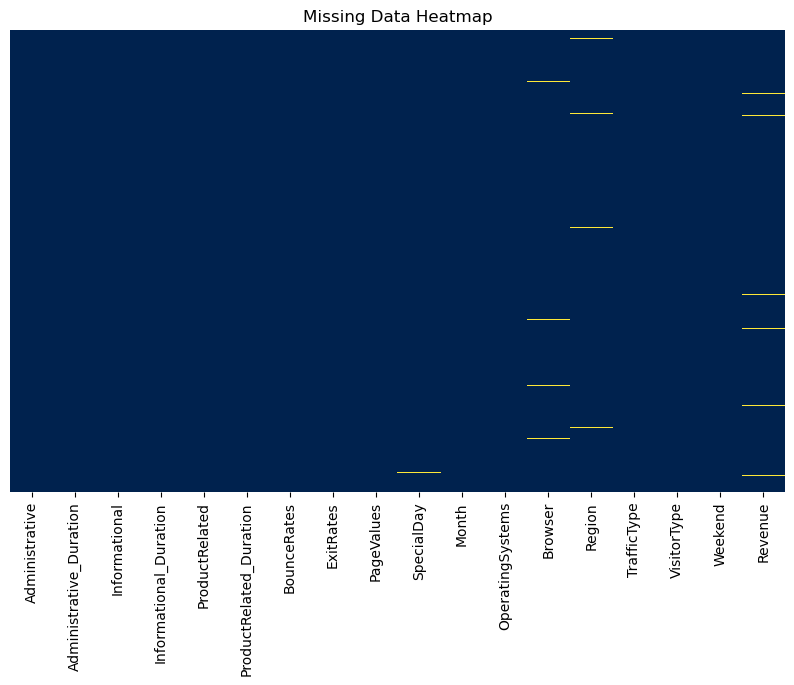

In [55]:
# Heatmap to visualize the missing data
missing = df.isnull()
plt.figure(figsize=(10, 6))
sns.heatmap(missing, cbar=False, yticklabels=False, cmap='cividis')  #viridis
plt.title('Missing Data Heatmap')
plt.show()

In [56]:
# Calculate the impact of drop rows with missing values
df_temp = df.copy()
rows_before_drop = len(df_temp)
df_temp.dropna(inplace=True)
rows_dropped = rows_before_drop - len(df_temp)
percentage_dropped = (rows_dropped / rows_before_drop) * 100
print(f"\nImpact of dropping all rows with missing values: {rows_dropped} rows ({percentage_dropped:.2}% of the dataset)")


Impact of dropping all rows with missing values: 687 rows (5.6% of the dataset)


In [57]:
# Drop duplicate rows
rows_dropped = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"\nDropped {rows_dropped} duplicate rows.")


Dropped 92 duplicate rows.


### Inspecting Columns with Missing Data
What should we do with missing values?

In [58]:
# Missing value columns
df.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)

Region        246
Browser       184
Revenue       147
SpecialDay    123
dtype: int64

In [60]:
df['Region'].value_counts()

1.0    4645
3.0    2329
4.0    1149
2.0    1108
6.0     785
7.0     741
9.0     495
8.0     424
5.0     316
Name: Region, dtype: int64

In [62]:
df['Browser'].value_counts().sort_index()

1.0     2397
2.0     7781
3.0      104
4.0      721
5.0      463
6.0      171
7.0       49
8.0      135
9.0        1
10.0     160
11.0       6
12.0      10
13.0      56
Name: Browser, dtype: int64

In [63]:
df['Revenue'].value_counts()

False    10211
True      1880
Name: Revenue, dtype: int64